# Project 1: Email Classifier
- Chloe Wallach
- Roberto Garcia
- Grant Fass

## Imports

In [28]:
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn import svm
from sklearn import metrics

## Load the Data

In [2]:
base_directory = os.path.abspath("./email_json_dataset1")
dir_exists = os.path.exists(base_directory)
file_names = []
if dir_exists:
    file_names = glob.glob(base_directory + "/**")
    print("Num JSON Files: %d" % (len(file_names)))


Num JSON Files: 63542


In [3]:
emails = []
for file in file_names:
    f = open(file)
    dictionary = json.load(f)
    emails.append(dictionary)

print("Type: %s, Len %d" % (type(emails), len(emails)))

Type: <class 'list'>, Len 63542


In [4]:
df = pd.DataFrame.from_records(emails)
df['label'] = df['label'].astype('category')
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   label         63542 non-null  category
 1   to_address    63141 non-null  object  
 2   from_address  63542 non-null  object  
 3   subject       63410 non-null  object  
 4   body          63542 non-null  object  
dtypes: category(1), object(4)
memory usage: 2.0+ MB


In [5]:
df.head(5)

,label,to_address,from_address,subject,body
0,spam,the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...
1,ham,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,Typo in /debian/README,"Hi, i've just updated from the gulus and I che..."
2,spam,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...",authentic viagra,authentic viagra\n\nMega authenticV I A G R A...
3,spam,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t..."
4,spam,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",or trembling; stomach cramps; trouble in sleep...,"\n\n\n\n\n\n\nsystem"" of the home. It will ha..."


In [17]:
df['label'].value_counts()

spam    40450
ham     23092
Name: label, dtype: int64

## Extract Features

In [6]:
vectorizer = CountVectorizer(binary=True, min_df=10)
x = vectorizer.fit_transform(df['body'])
x

<63542x32144 sparse matrix of type '<class 'numpy.int64'>'
	with 6388757 stored elements in Compressed Sparse Row format>

## Dim Reduction

In [10]:
vec = TruncatedSVD(n_components=10)
truncated = vec.fit_transform(x)
truncated.shape

(63542, 10)

In [11]:
vec.explained_variance_ratio_

array([0.05746724, 0.02766835, 0.01722695, 0.01308168, 0.01357575,
       0.01083523, 0.01051984, 0.00992015, 0.00802538, 0.00788901])

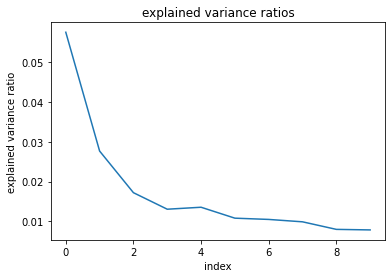

In [12]:
plt.plot(vec.explained_variance_ratio_)
plt.xlabel('index')
plt.ylabel('explained variance ratio')
plt.title('explained variance ratios')
plt.show()

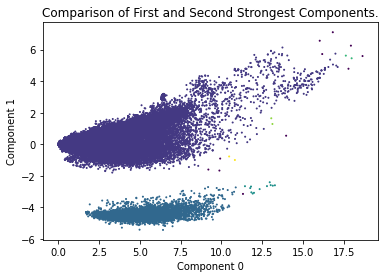

In [23]:
clustering = DBSCAN(min_samples=2).fit(truncated[:, 0:2])
plt.scatter(truncated[:, 0], truncated[:, 1], c=clustering.labels_, s=1)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('Comparison of First and Second Strongest Components.')
plt.show()

In [25]:
# y = df['label']
# x = df.drop(columns=['label'])
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
y = clustering.labels_
x = truncated
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
print("x_train: %s\nx_test: %s\ny_train: %s\ny_test: %s" % (str(x_train.shape), str(x_test.shape), str(y_train.shape), str(y_test.shape)))

x_train: (38125, 10)
x_test: (25417, 10)
y_train: (38125,)
y_test: (25417,)


In [27]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [29]:
print("Accuracy: %.2f" % (metrics.accuracy_score(y_test, y_pred)))

Accuracy: 1.00
